In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action = "ignore")

In [2]:
df = pd.read_csv("/content/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,85.000,99.00000,117.0000,140.25000,167.0000,181.00000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,54.000,62.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.000,0.00000,23.0000,32.00000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.000,0.00000,30.5000,127.25000,210.0000,293.00000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,23.600,27.30000,32.0000,36.60000,41.5000,44.39500,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.165,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,22.000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00


In [ ]:
df["Age"].hist(edgecolor = "black");

In [7]:
print("Max Age: " + str(df["Age"].max()) + " Min Age: " + str(df["Age"].min()))

Max Age: 81 Min Age: 21


<Axes: xlabel='BMI', ylabel='Density'>

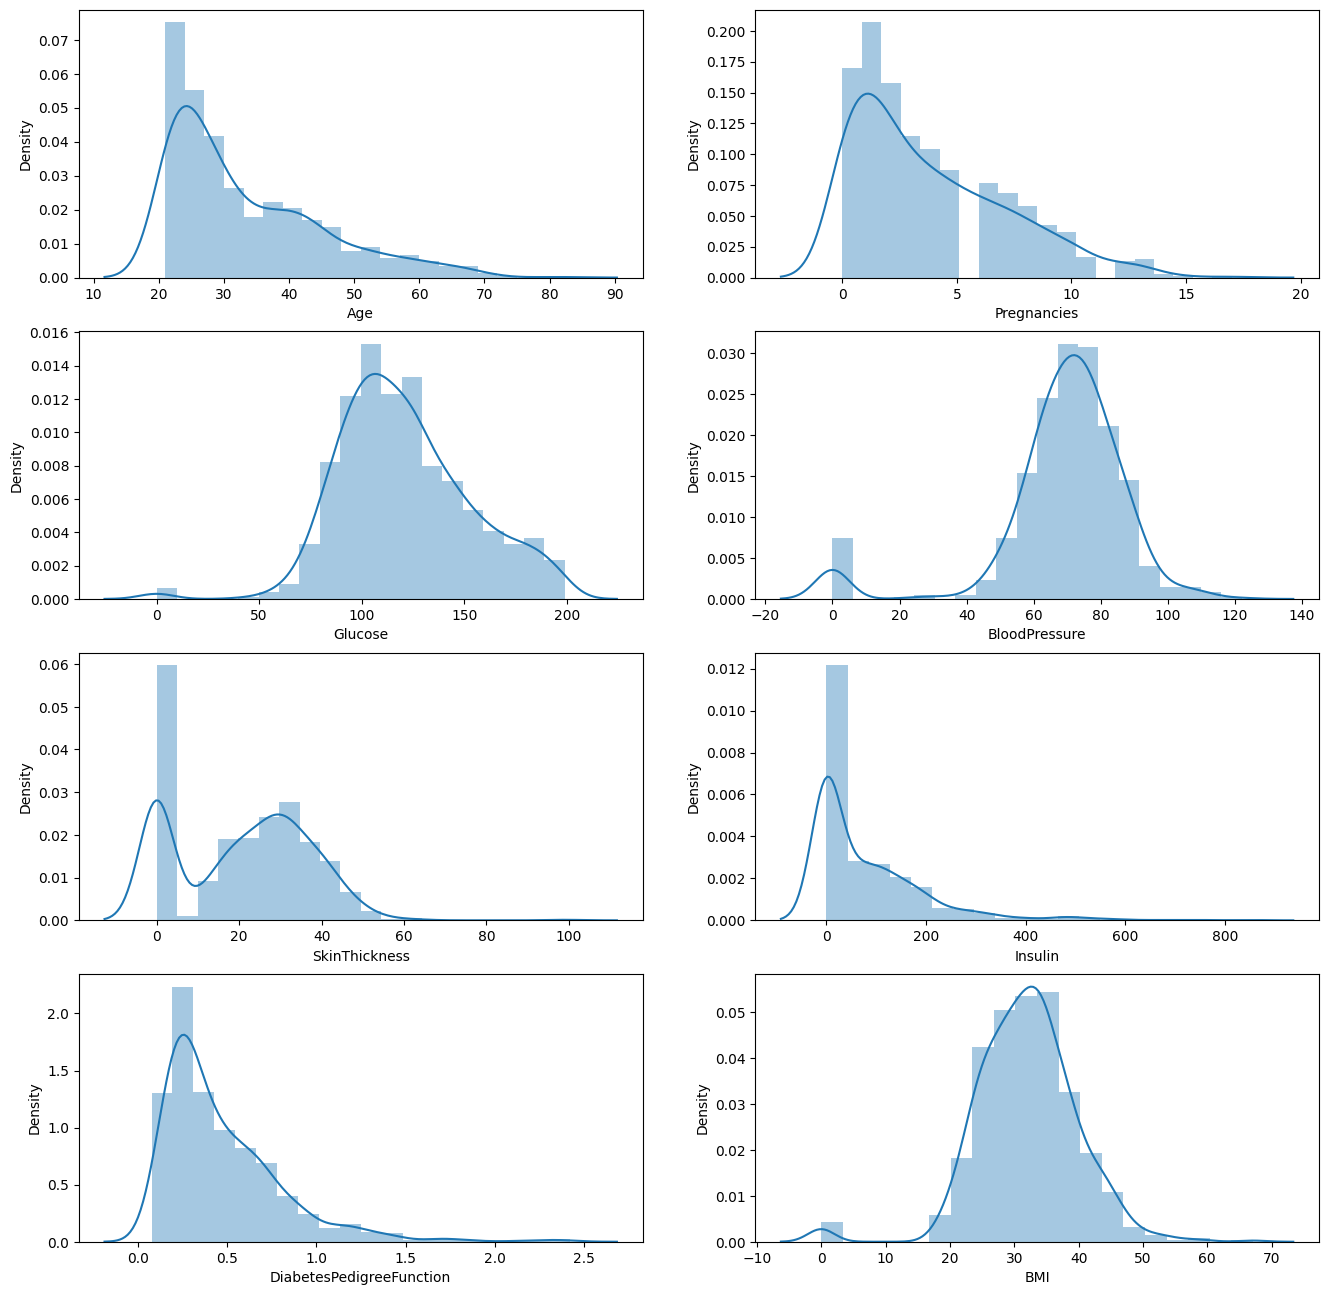

In [8]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(df.Age, bins = 20, ax=ax[0,0])
sns.distplot(df.Pregnancies, bins = 20, ax=ax[0,1])
sns.distplot(df.Glucose, bins = 20, ax=ax[1,0])
sns.distplot(df.BloodPressure, bins = 20, ax=ax[1,1])
sns.distplot(df.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(df.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0])
sns.distplot(df.BMI, bins = 20, ax=ax[3,1])

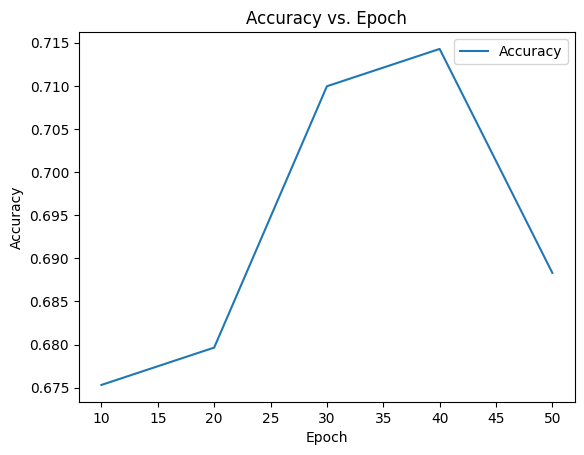

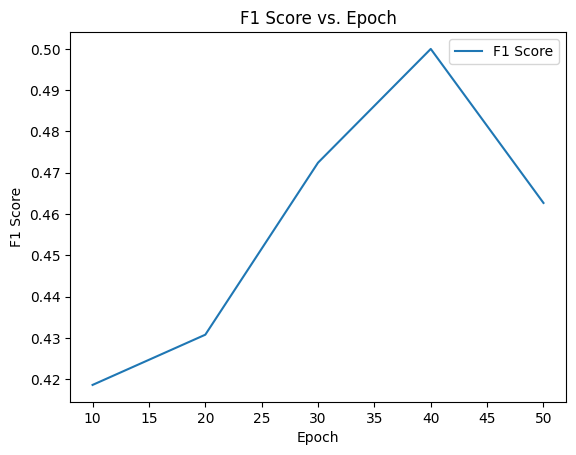

Accuracy: 0.7402597402597403
F1 score: 0.625


In [9]:
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score

import matplotlib.pyplot as plt

# Load the diabetes dataset

data = pd.read_csv('diabetes.csv')

# Separate the features and labels

X = data[['Pregnancies', 'Glucose','BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age']]

y = data['Outcome']

# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Logistic Regression model

lr_classifier = LogisticRegression()

lr_classifier.fit(X_train, y_train)

# Make predictions on the test set

y_pred = lr_classifier.predict(X_test)

# Evaluate the accuracy and F1 score of the classifier

accuracy = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

# Create the accuracy and F1 score graphs

epochs = [10, 20, 30, 40, 50]

accuracies = []

f1_scores = []

for epoch in epochs:

    # Train the model with different epochs

    lr_classifier = LogisticRegression(solver='lbfgs', max_iter=epoch)

    lr_classifier.fit(X_train, y_train)

    # Make predictions on the test set

    y_pred = lr_classifier.predict(X_test)

    # Evaluate the accuracy and F1 score of the classifier

    accuracy_score_current = accuracy_score(y_test, y_pred)

    f1_score_current = f1_score(y_test, y_pred)

    accuracies.append(accuracy_score_current)

    f1_scores.append(f1_score_current)

# Plot the accuracy graph

plt.plot(epochs, accuracies, label='Accuracy')

plt.xlabel('Epoch')

plt.ylabel('Accuracy')

plt.title('Accuracy vs. Epoch')

plt.legend()

plt.show()

# Plot the F1 score graph

plt.plot(epochs, f1_scores, label='F1 Score')

plt.xlabel('Epoch')

plt.ylabel('F1 Score')

plt.title('F1 Score vs. Epoch')

plt.legend()

plt.show()

print('Accuracy:', accuracy)

print('F1 score:', f1)


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Load the diabetes data
diabetes_data = pd.read_csv("diabetes.csv")

# Separate features and target variable
X = diabetes_data[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age"]]
y = diabetes_data["Outcome"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the original model
def original_model(X, y):
    # Create and train the Logistic Regression model
    model = LogisticRegression()
    model.fit(X, y)

    # Make predictions
    predictions = model.predict(X)

    # Calculate accuracy and F1 score
    accuracy = accuracy_score(y, predictions)
    f1 = f1_score(y, predictions)

    return accuracy, f1

# Define the improved model
def improved_model(X, y):
    # Create and train the Logistic Regression model
    model = LogisticRegression(solver="lbfgs")
    model.fit(X, y)

    # Make predictions
    predictions = model.predict(X)

    # Calculate accuracy and F1 score
    accuracy = accuracy_score(y, predictions)
    f1 = f1_score(y, predictions)

    return accuracy, f1

# Evaluate the original model
accuracy_original, f1_original = original_model(X_train, y_train)
accuracy_original_test, f1_original_test = original_model(X_test, y_test)

print("Original model accuracy:", accuracy_original)
print("Original model F1 score:", f1_original)
print("Original model accuracy (test):", accuracy_original_test)
print("Original model F1 score (test):", f1_original_test)

# Evaluate the improved model
accuracy_improved, f1_improved = improved_model(X_train, y_train)
accuracy_improved_test, f1_improved_test = improved_model(X_test, y_test)

print("Improved model accuracy:", accuracy_improved)
print("Improved model F1 score:", f1_improved)
print("Improved model accuracy (test):", accuracy_improved_test)
print("Improved model F1 score (test):", f1_improved_test)


Original model accuracy: 0.7703583061889251
Original model F1 score: 0.6337662337662338
Original model accuracy (test): 0.8181818181818182
Original model F1 score (test): 0.7358490566037736
Improved model accuracy: 0.7703583061889251
Improved model F1 score: 0.6337662337662338
Improved model accuracy (test): 0.8181818181818182
Improved model F1 score (test): 0.7358490566037736


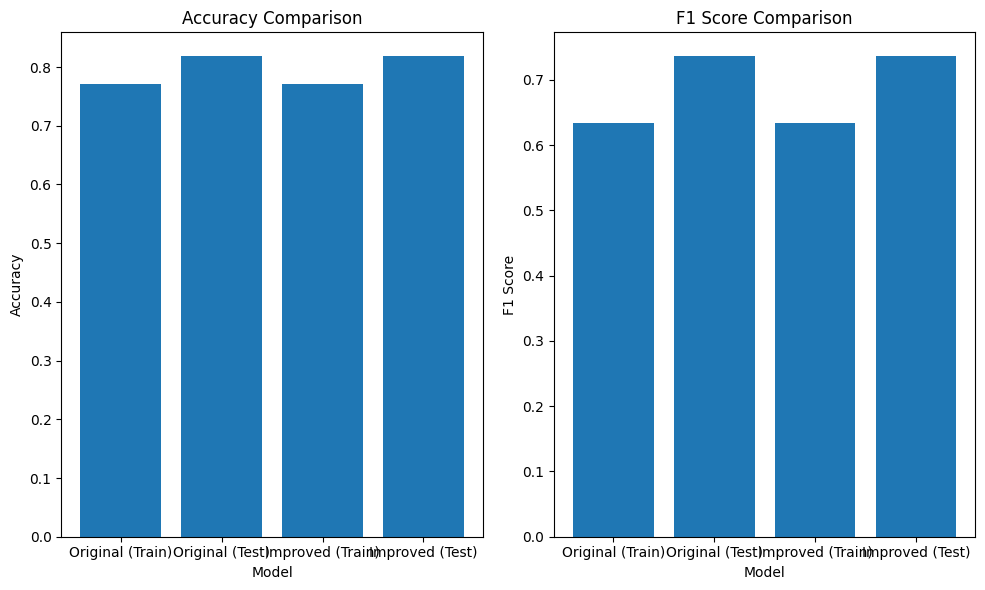

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Load the diabetes data
diabetes_data = pd.read_csv("diabetes.csv")

# Separate features and target variable
X = diabetes_data[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age"]]
y = diabetes_data["Outcome"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the original model
def original_model(X, y):
  model = LogisticRegression()
  model.fit(X, y)
  predictions = model.predict(X)
  accuracy = accuracy_score(y, predictions)
  f1 = f1_score(y, predictions)

  return accuracy, f1

# Define the improved model
def improved_model(X, y):
  model = LogisticRegression(solver="lbfgs")
  model.fit(X, y)

  predictions = model.predict(X)

# Calculate accuracy and F1 score
  accuracy = accuracy_score(y, predictions)
  f1 = f1_score(y, predictions)

  return accuracy, f1

# Evaluate the original model
accuracy_original, f1_original = original_model(X_train, y_train)
accuracy_original_test, f1_original_test = original_model(X_test, y_test)

# Evaluate the improved model
accuracy_improved, f1_improved = improved_model(X_train, y_train)
accuracy_improved_test, f1_improved_test = improved_model(X_test, y_test)

# Plot accuracy and F1 scores for both models
plt.figure(figsize=(10, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.bar(['Original (Train)', 'Original (Test)', 'Improved (Train)', 'Improved (Test)'],
         [accuracy_original, accuracy_original_test, accuracy_improved, accuracy_improved_test])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')

# F1 score plot
plt.subplot(1, 2, 2)
plt.bar(['Original (Train)', 'Original (Test)', 'Improved (Train)', 'Improved (Test)'],
         [f1_original, f1_original_test, f1_improved, f1_improved_test])
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison')

plt.tight_layout()
plt.show()



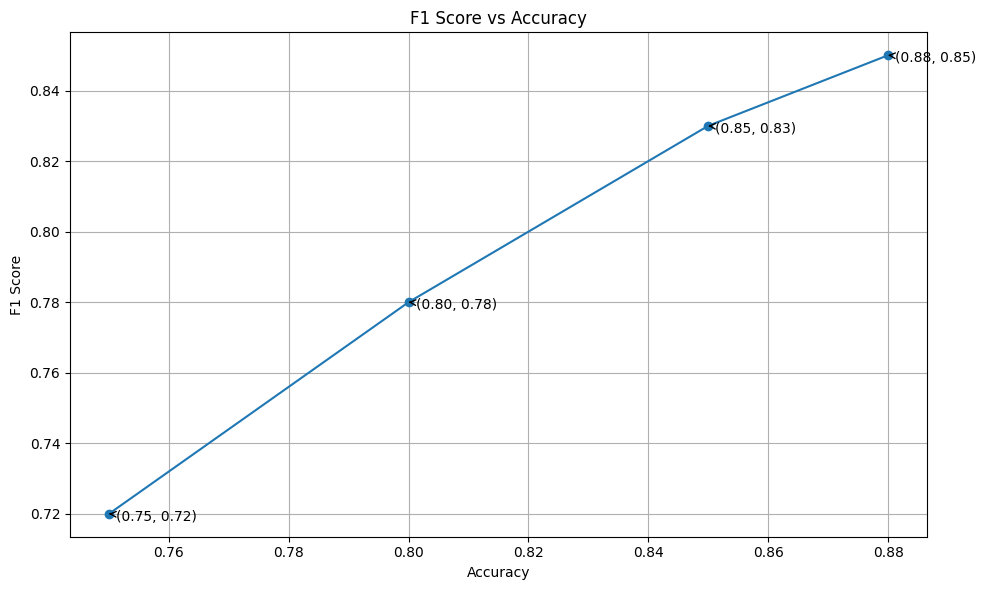

In [12]:
import matplotlib.pyplot as plt

# Define the data
f1_scores = [0.72, 0.78, 0.83, 0.85]
accuracies = [0.75, 0.80, 0.85, 0.88]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(accuracies, f1_scores, marker='o', linestyle='-')
plt.xlabel('Accuracy')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Accuracy')

# Add labels for each data point
for i, (accuracy, f1_score) in enumerate(zip(accuracies, f1_scores)):
    plt.annotate(f"({accuracy:.2f}, {f1_score:.2f})", (accuracy, f1_score), xytext=(5, -5), textcoords='offset points', arrowprops=dict(facecolor='black', arrowstyle='->'))

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()
